In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from sec_api import MappingApi
import time 
import json

In [3]:
df = pd.read_csv('Warren_Buffett_final_df.csv')
print(df)

                        issuer     title      cusip       value    shares  \
0                ALLY FINL INC       COM  02005N100   504589507  12719675   
1                ALLY FINL INC       COM  02005N100   111229721   2803875   
2                ALLY FINL INC       COM  02005N100   167732694   4228200   
3                ALLY FINL INC       COM  02005N100   124444790   3137000   
4                ALLY FINL INC       COM  02005N100   191854038   4836250   
..                         ...       ...        ...         ...       ...   
467                    AON PLC  SHS CL A  G0403H108   699283103   1752194   
468  LIBERTY LATIN AMERICA LTD  COM CL A  G9001E102     6365492   1005607   
469  LIBERTY LATIN AMERICA LTD  COM CL A  G9001E102    10287421   1625185   
470  LIBERTY LATIN AMERICA LTD  COM CL C  G9001E128     7973764   1284020   
471              CHUBB LIMITED       COM  H1467J104  8163932430  27033784   

           date  
0    2024-08-14  
1    2024-08-14  
2    2024-08-14  
3  

In [4]:
mappingApi = MappingApi(api_key='a758e3c17491b8ff4ac78bf21bc4d09418bdc45f51ea4c08a84bdf47987faca5')

df = pd.read_csv("Warren_Buffett_final_df.csv")
df['date'] = pd.to_datetime(df['date'])


unique_cusips = df['cusip'].unique()

def cusip_to_ticker(cusip):
    result = mappingApi.resolve('cusip', cusip)
    return result[0].get('ticker')

cusip_to_ticker_dict = {}
for cusip in unique_cusips:
    cusip_to_ticker_dict[cusip] = cusip_to_ticker(cusip)  

df['ticker'] = df['cusip'].map(cusip_to_ticker_dict)

df = df.sort_values(['ticker', 'date'])
print(df)
df.to_csv('Warren_Buffett_final_df_with_ticker.csv', index=False)


KeyboardInterrupt: 

In [ ]:
%pip install networkx

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 1.1 MB/s eta 0:00:02
   -------------------- ------------------- 1.0/2.0 MB 1.5 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.0 MB 1.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.8/2.0 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.7 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import networkx as nx

df = pd.read_csv('Warren_Buffett_final_df_with_ticker.csv')
def bipartite_graph(df):
    G = nx.Graph()

    G.add_node("Buffett", bipartite=0)
    for stock in df['ticker'].dropna().unique():
        G.add_node(stock, bipartite=1)
        G.add_edge("Buffett", stock)
    return G

B = bipartite_graph(df)

In [ ]:
%pip install matplotlib

  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 2.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.1 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.0 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.0 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.0 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 2.0 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 1.9 MB/s eta 0:00:03
   --------------------- ------------------ 4.5/8.1 MB 2.0 MB/s eta 0:00:02
   ------------------------ -

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

holdings = pd.read_csv("Warren_Buffett_final_df_with_ticker.csv")
fundamentals = pd.ExcelFile("Warren_Buffett_Analysis.xlsx")

# print(holdings.head())
# print(fundamentals.sheet_names)



In [4]:
%pip install lxml

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/4.0 MB 4.1 MB/s eta 0:00:01
   ----- ---------------------------------- 0.5/4.0 MB 4.1 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/4.0 MB 1.5 MB/s eta 0:00:03
   ------------------ --------------------- 1.8/4.0 MB 2.1 MB/s eta 0:00:02
   -------------------- ------------------- 2.1/4.0 MB 2.0 MB/s eta 0:00:01
   ----------------------- ---------------- 2.4/4.0 MB 2.0 MB/s eta 0:00:01
   ---------------------------- ----------- 2.9/4.0 MB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 3.1/4.0 MB 1.9 MB/s eta 0:00:01
   ------------------------------------ --- 3.7/4.0 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 1.9 MB/s  0:00:02
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import requests
import yfinance as yf

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
sp500_table = pd.read_html(resp.text, header=0)[0]
sp500_symbols = sp500_table["Symbol"].tolist()

# print(len(sp500_symbols))
# print(sp500_symbols[:100])


quarter_dates = ["2024-08-14", "2024-11-14", "2025-02-14", "2025-05-15"]

def get_quarterly_data(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="2y", interval="3mo")
    
    data = {}
    for date in quarter_dates:
        row = hist.loc[:date].tail(1)
        if not row.empty:
            r = row.iloc[0]
            data[date] = {
                "Open": r["Open"],
                "High": r["High"],
                "Low": r["Low"],
                "Close": r["Close"],
                "Volume": r["Volume"]
            }
    return pd.DataFrame(data).T

all_quarterly_data = {}
for ticker in sp500_symbols[:500]:
    df = get_quarterly_data(ticker)
    all_quarterly_data[ticker] = df

print(all_quarterly_data)


C:\Users\revan\AppData\Local\Temp\ipykernel_21640\2613048705.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp500_table = pd.read_html(resp.text, header=0)[0]
$BRK.B: possibly delisted; no price data found  (period=2y) (Yahoo error = "No data found, symbol may be delisted")
$BF.B: possibly delisted; no price data found  (period=2y)


{'MMM':                   Open        High         Low       Close       Volume
2024-08-14  124.339967  137.836945  116.352950  125.285927  239989000.0
2024-11-14  125.961311  151.973247  122.392391  149.227921  216085600.0
2025-02-14  147.044811  154.112201  120.234129  136.921814  256591200.0
2025-05-15  136.973171  162.598679  136.329320  147.809784  212574600.0, 'AOS':                  Open       High        Low      Close       Volume
2024-08-14  83.382261  90.286650  73.368936  73.653351   63410000.0
2024-11-14  74.290131  76.762851  64.556849  66.300568   69428600.0
2025-02-14  66.052968  70.251206  58.250581  67.191643   92698300.0
2025-05-15  67.902486  76.938895  61.901429  70.450195  107865700.0, 'ABT':                   Open        High         Low       Close       Volume
2024-08-14  104.639011  117.590109  104.325045  111.232300  327476300.0
2024-11-14  118.045731  128.001994  109.282253  126.109314  351177000.0
2025-02-14  125.502695  139.950610  119.378678  129.565552  

In [ ]:
data = []
for ticker, df in all_quarterly_data.items():
    df = df.reset_index().rename(columns={"index": "Date"})
    df['Ticker'] = ticker
    data.append(df)

SP500_quarterly_data = pd.concat(data, ignore_index=True)
# SP500_quarterly_data.to_csv("SP500_quarterly_data.csv", index=False)

In [2]:
SP500_quarterly_df = pd.read_csv("SP500_quarterly_data.csv")

test_date = "2024-08-14"

test_date_data = SP500_quarterly_df[SP500_quarterly_df['Date'] == test_date]
# print(test_date_data)

In [3]:
tickers = holdings['ticker'].dropna().unique()

snapshots = {}


for date, df in holdings.groupby('date'):
    G = nx.Graph()
    agg = df.groupby("ticker").agg({"shares":"sum", "value":"sum"}).reset_index()

    for _, row in agg.iterrows():
        investor = "Buffett"
        stock = row['ticker']
        G.add_node(investor, bipartite=0)
        G.add_node(stock, bipartite=1)
        G.add_edge(investor, stock, value=row['value'], shares=row['shares'])
    snapshots[date] = G

print(snapshots)

{'2024-08-14': <networkx.classes.graph.Graph object at 0x0000025A19C62660>, '2024-11-14': <networkx.classes.graph.Graph object at 0x0000025A6C21B250>, '2025-02-14': <networkx.classes.graph.Graph object at 0x0000025A19CAAAD0>, '2025-05-15': <networkx.classes.graph.Graph object at 0x0000025A19D41F30>}


In [ ]:
G = snapshots[test_date]

for _, row in test_date_data.iterrows():
    stock = row['Ticker']
    
    if stock in G:
        continue

    G.add_node(
        stock,
        bipartite=1,
        Close=row.get("Close"),
        MarketCap=row.get("MarketCap", None),
        PE=row.get("PE", None),
        DividendYield=row.get("DividendYield", None),
        Volume=row.get("Volume", None)
    )

print(G)


Graph with 518 nodes and 41 edges


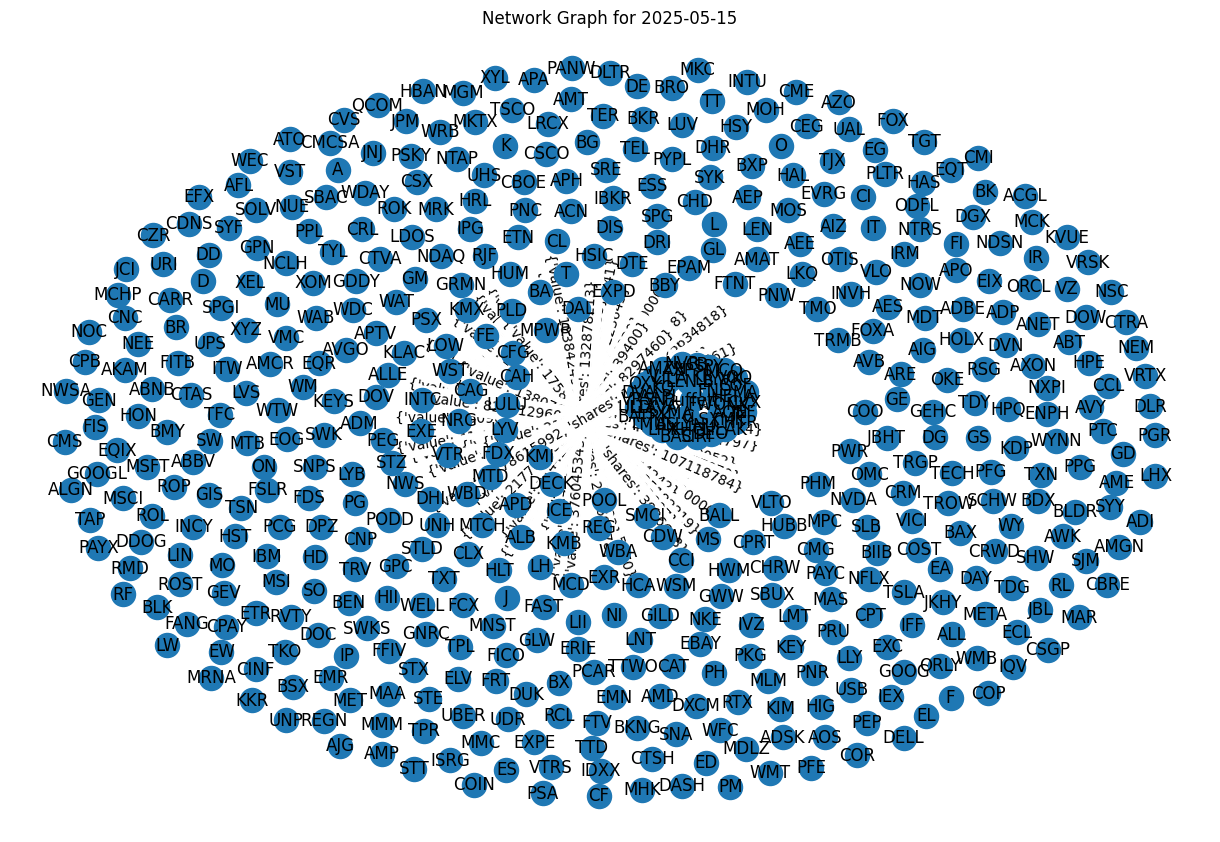

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))
plt.title(f"Network Graph for {date}")
plt.show()

In [8]:
holdings["date"].unique()


array(['2024-08-14', '2024-11-14', '2025-02-14', '2025-05-15'],
      dtype=object)

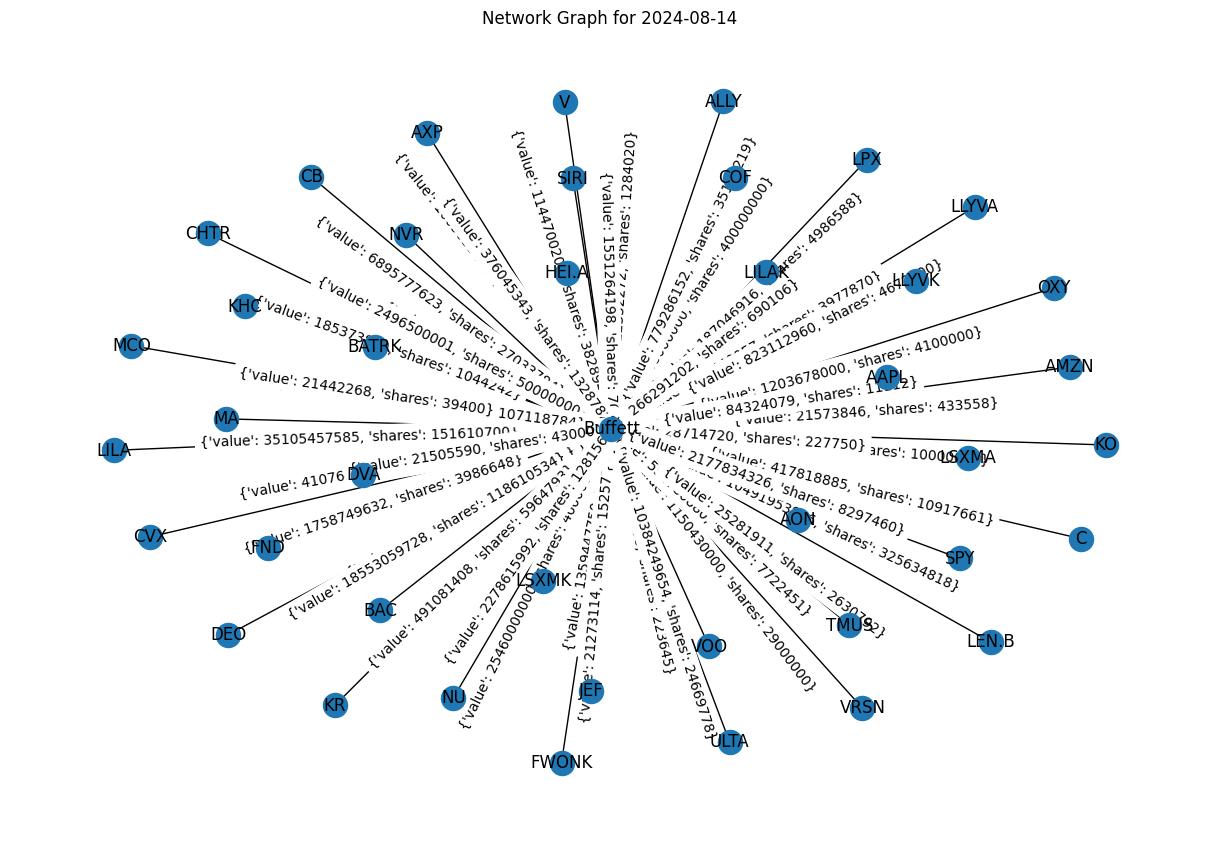

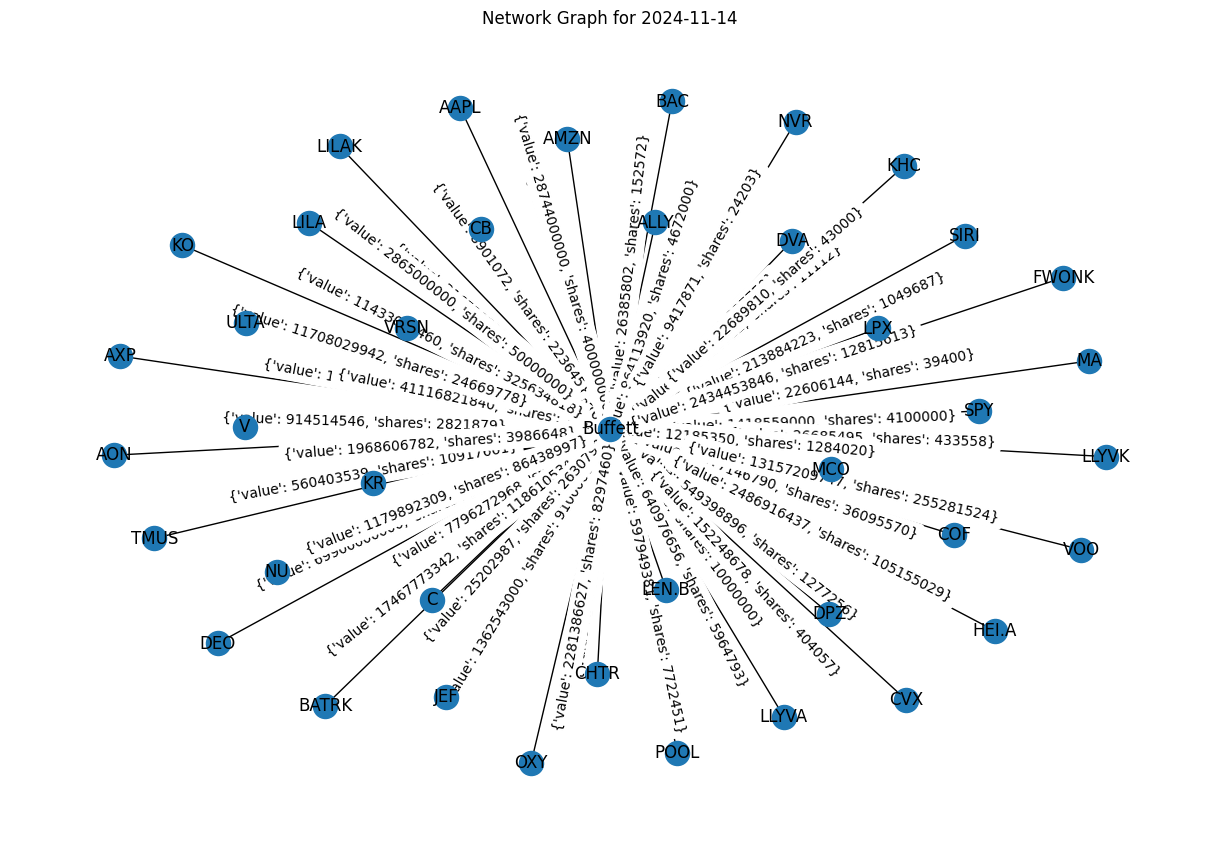

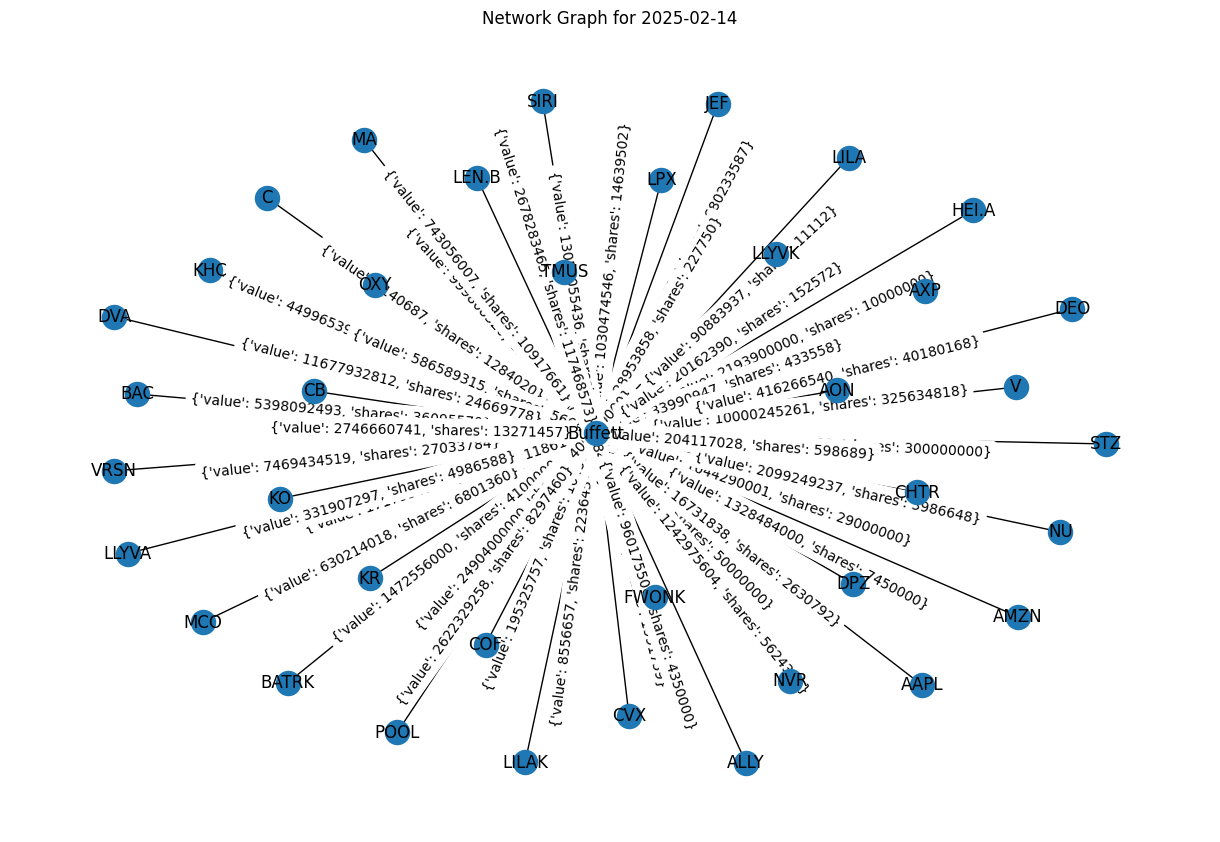

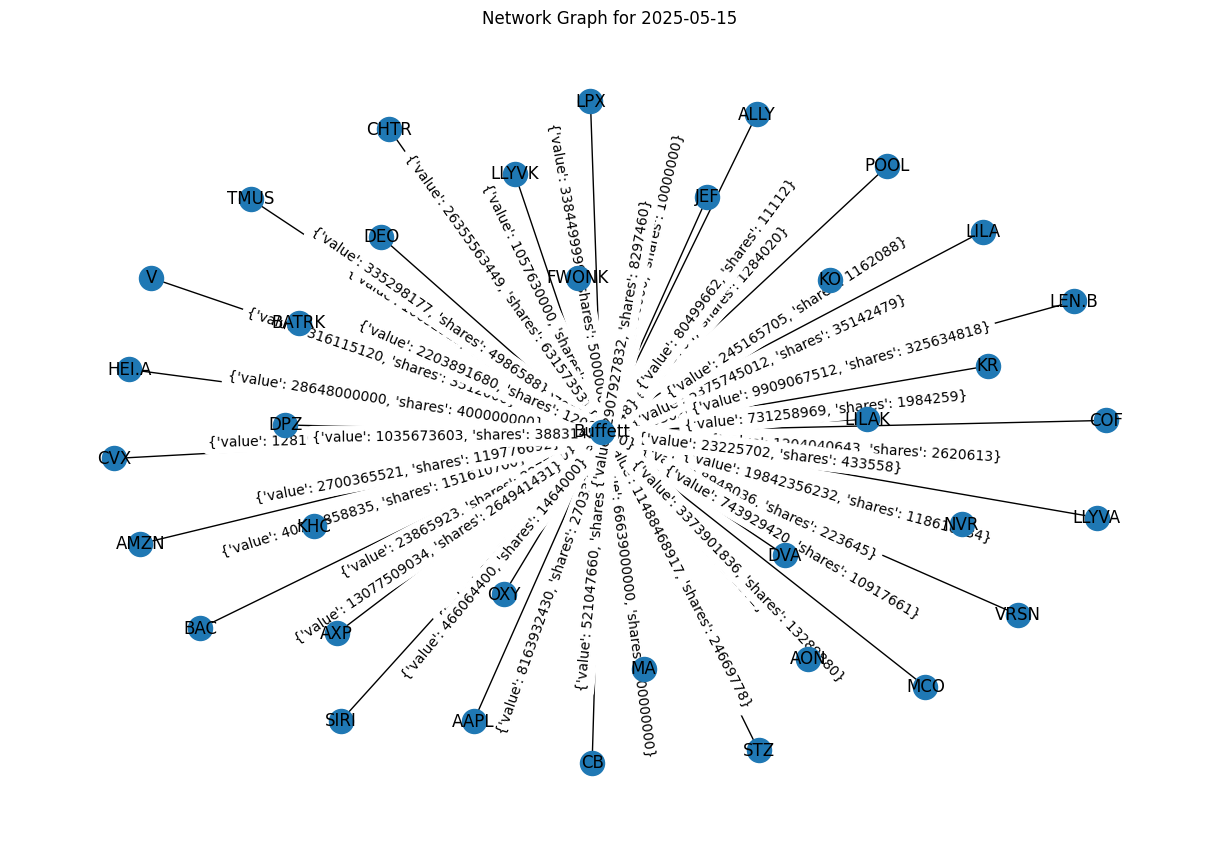

In [7]:
# plt.figure(figsize=(12, 8))
# nx.draw(snapshots['2024-08-14'], with_labels=True)
# nx.draw_networkx_edge_labels(snapshots['2024-08-14'], pos=nx.spring_layout(snapshots['2024-08-14']))
# plt.show()

for date, G in snapshots.items():
    plt.figure(figsize=(12, 8))
    nx.draw(G, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))
    plt.title(f"Network Graph for {date}")
    plt.show()


In [10]:
#comparing between dates

def portfolio_comparison(G1, G2, investor="Buffett"):
    old_portfolio = set(G1.neighbors(investor))
    new_portfolio = set(G2.neighbors(investor))

    added = new_portfolio - old_portfolio
    removed = old_portfolio - new_portfolio

    return added, removed

dates = sorted(snapshots.keys())
for i in range(len(dates)-1):
    date1 = dates[i]
    date2 = dates[i+1]
    G1 = snapshots[date1]
    G2 = snapshots[date2]

    added, removed = portfolio_comparison(G1, G2)
    print(f"From {date1} to {date2}:")
    print(f"  Added: {added}")
    print(f"  Removed: {removed}")
    print()

From 2024-08-14 to 2024-11-14:
  Added: {'DPZ', 'POOL'}
  Removed: {'FND', 'LSXMK', 'LSXMA'}

From 2024-11-14 to 2025-02-14:
  Added: {'STZ'}
  Removed: {'ULTA', 'VOO', 'SPY'}

From 2025-02-14 to 2025-05-15:
  Added: set()
  Removed: {'C', 'NU'}



In [ ]:
# Adding SP500 stocks to the graph




In [11]:
def get_candidates(snapshots, holdings, dates, investor="Buffett"):
    all_stocks = set(holdings['ticker'].dropna().unique())
    candidates_per_snapshot = {}

    for i in range(len(dates)):
        G_test = snapshots[dates[i]]
        current_holdings = set(G_test.neighbors(investor))
        candidates = [(investor, stock) for stock in all_stocks - current_holdings]
        candidates_per_snapshot[dates[i]] = candidates

    return candidates_per_snapshot

candidates = get_candidates(snapshots, holdings, dates)
print(candidates)

{'2024-08-14': [('Buffett', 'DPZ'), ('Buffett', 'POOL'), ('Buffett', 'STZ')], '2024-11-14': [('Buffett', 'FND'), ('Buffett', 'STZ'), ('Buffett', 'LSXMK'), ('Buffett', 'LSXMA')], '2025-02-14': [('Buffett', 'FND'), ('Buffett', 'LSXMK'), ('Buffett', 'ULTA'), ('Buffett', 'LSXMA'), ('Buffett', 'VOO'), ('Buffett', 'SPY')], '2025-05-15': [('Buffett', 'FND'), ('Buffett', 'NU'), ('Buffett', 'LSXMK'), ('Buffett', 'ULTA'), ('Buffett', 'LSXMA'), ('Buffett', 'VOO'), ('Buffett', 'C'), ('Buffett', 'SPY')]}


In [35]:
# Resource Allocation Index, Matrix Factorization

In [23]:
%pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 4.5 MB/s eta 0:00:09
    --------------------------------------- 0.8/38.5 MB 2.0 MB/s eta 0:00:19
   - -------------------------------------- 1.3/38.5 MB 1.9 MB/s eta 0:00:20
   - -------------------------------------- 1.8/38.5 MB 1.9 MB/s eta 0:00:20
   -- ------------------------------------- 2.1/38.5 MB 1.9 MB/s eta 0:00:20
   -- ------------------------------------- 2.6/38.5 MB 1.9 MB/s eta 0:00:20
   -- ------------------------------------- 2.9/38.5 MB 1.9 MB/s eta 0:00:20
   --- ------------------------------------ 3.4/38.5 MB 1.9 MB/s eta 0:00:19
   --- ------------------------------------ 3.7/38.5 MB 1.8 MB/s eta 0:00:19
   ---- ----------------------------------- 3.9/38.5 MB 1.8 MB/s eta 0:00:19
   ---- ----------------------------------- 4.5/38.5 MB 1.8 MB/s eta 0:00:19
   ---- -----

In [ ]:
# # Bipartite link Prediction using Structural Perturbation Method

# import numpy as np
# from networkx.algorithms import bipartite
# import scipy

# G_test = snapshots['2024-08-14']

# def structural_perturbation_method(G, investor="Buffett", perturb_frac=0.01, top_k=10):
#     investors = [n for n, d in G.nodes(data=True) if d.get("bipartite") == 0]
#     stocks = [n for n, d in G.nodes(data=True) if d.get("bipartite") == 1]

#     # Full bipartite adjacency
#     A = bipartite.biadjacency_matrix(G, row_order=investors, column_order=stocks).toarray()

#     # perturbation: remove fraction of Buffett's edges
#     buffett_idx = investors.index(investor)
#     edges = list(G.edges(investor))
#     np.random.shuffle(edges)
#     m = int(len(edges) * perturb_frac)
#     removed_edges = edges[:m]

#     A_perturbed = A.copy()
#     for _, stock in removed_edges:
#         j = stocks.index(stock)
#         A_perturbed[buffett_idx, j] = 0

#     # eigen decomposition
#     M = A_perturbed @ A_perturbed.T
#     eigvals, eigvecs = np.linalg.eigh(M)

#     # reconstruct adjacency
#     A_reconstructed = eigvecs @ np.diag(eigvals) @ eigvecs.T @ A_perturbed

#     # scores for Buffett's potential new links
#     scores = A_reconstructed[buffett_idx]

#     current_holdings = set(G.neighbors(investor))
#     candidates = [(investor, stock, scores[j]) for j, stock in enumerate(stocks) if stock not in current_holdings]

#     candidates.sort(key=lambda x: x[2], reverse=True)
#     return candidates[:top_k]

# scores = structural_perturbation_method(G_test, investor="Buffett", perturb_frac=0.01, top_k=10)
# print(scores)

[]


In [9]:
from networkx.algorithms import bipartite

def structural_perturbation_bipartite(G, investor="Buffett", perturb_frac=0.1, top_k=10, feature_weight=0.2):
    investors = [n for n, d in G.nodes(data=True) if d.get("bipartite") == 0]
    stocks = [n for n, d in G.nodes(data=True) if d.get("bipartite") == 1]
    
    A = bipartite.biadjacency_matrix(G, row_order=investors, column_order=stocks).toarray()
    
    i_idx = investors.index(investor)
    
    investor_edges = [j for j in range(A.shape[1]) if A[i_idx, j] == 1]
    np.random.shuffle(investor_edges)
    m = int(len(investor_edges) * perturb_frac)
    removed_edges = investor_edges[:m]
    
    A_perturbed = A.copy()
    A_perturbed[i_idx, removed_edges] = 0
    
    M = A_perturbed @ A_perturbed.T
    eigvals, eigvecs = np.linalg.eigh(M)

    A_reconstructed = eigvecs @ np.diag(eigvals) @ eigvecs.T @ A_perturbed
    structural_scores = A_reconstructed[i_idx]
    
    def feature_similarity(u, v):
        feats_u = [val for val in G.nodes[u].values() if isinstance(val, (int, float)) and val is not None]
        feats_v = [val for val in G.nodes[v].values() if isinstance(val, (int, float)) and val is not None]
        if not feats_u or not feats_v or len(feats_u) != len(feats_v):
            return 0.0
        return np.corrcoef(feats_u, feats_v, rowvar=False)[0, 1]
    
    candidates = []
    for j, stock in enumerate(stocks):
        if A[i_idx, j] == 1: 
            continue
        s_score = structural_scores[j]
        f_score = feature_similarity(investor, stock)
        final_score = s_score + f_score * feature_weight
        candidates.append((investor, stock, final_score))
    

    candidates.sort(key=lambda x: x[2], reverse=True)
    return candidates

predictions = structural_perturbation_bipartite(G, investor="Buffett", top_k=10)

print("Top predicted stocks for Buffett:")
for rank, (inv, stock, score) in enumerate(predictions, 1):
    print(f"{rank}. {stock} → Score: {score:.4f}")


Top predicted stocks for Buffett:
1. MMM → Score: 0.0000
2. AOS → Score: 0.0000
3. ABT → Score: 0.0000
4. ABBV → Score: 0.0000
5. ACN → Score: 0.0000
6. ADBE → Score: 0.0000
7. AMD → Score: 0.0000
8. AES → Score: 0.0000
9. AFL → Score: 0.0000
10. A → Score: 0.0000
11. APD → Score: 0.0000
12. ABNB → Score: 0.0000
13. AKAM → Score: 0.0000
14. ALB → Score: 0.0000
15. ARE → Score: 0.0000
16. ALGN → Score: 0.0000
17. ALLE → Score: 0.0000
18. LNT → Score: 0.0000
19. ALL → Score: 0.0000
20. GOOGL → Score: 0.0000
21. GOOG → Score: 0.0000
22. MO → Score: 0.0000
23. AMCR → Score: 0.0000
24. AEE → Score: 0.0000
25. AEP → Score: 0.0000
26. AIG → Score: 0.0000
27. AMT → Score: 0.0000
28. AWK → Score: 0.0000
29. AMP → Score: 0.0000
30. AME → Score: 0.0000
31. AMGN → Score: 0.0000
32. APH → Score: 0.0000
33. ADI → Score: 0.0000
34. APA → Score: 0.0000
35. APO → Score: 0.0000
36. AMAT → Score: 0.0000
37. APTV → Score: 0.0000
38. ACGL → Score: 0.0000
39. ADM → Score: 0.0000
40. ANET → Score: 0.0000
41.

In [31]:
G = snapshots['2024-08-14']
# for n, d in G.nodes(data=True):
#     print(n, d)

print("Buffett neighbors:", list(G.neighbors("Buffett")))



Buffett neighbors: ['AAPL', 'ALLY', 'AMZN', 'AON', 'AXP', 'BAC', 'BATRK', 'C', 'CB', 'CHTR', 'COF', 'CVX', 'DEO', 'DVA', 'FND', 'FWONK', 'HEI.A', 'JEF', 'KHC', 'KO', 'KR', 'LEN.B', 'LILA', 'LILAK', 'LLYVA', 'LLYVK', 'LPX', 'LSXMA', 'LSXMK', 'MA', 'MCO', 'NU', 'NVR', 'OXY', 'SIRI', 'SPY', 'TMUS', 'ULTA', 'V', 'VOO', 'VRSN']
